
# Redes Neuronales Recurrentes y Prophet para Predicción de Series Temporales (Core) / Elida Peña

**Descripción:**

En este ejercicio, implementarás una red neuronal recurrente (RNN) utilizando LSTM para predecir valores futuros en una serie temporal. Además, se te pide que explores el uso de la herramienta Prophet, un modelo de predicción de series temporales desarrollado por Facebook, y compares los resultados obtenidos con los de la RNN.



**Objetivo:**

El objetivo es predecir los valores futuros de una serie temporal utilizando redes recurrentes y comparar su rendimiento con Prophet. Este ejercicio te permitirá explorar dos enfoques distintos para la predicción de series temporales.



**Instrucciones:**

1. Selección del dataset:
  – Utiliza un dataset de series temporales de Kaggle, como el de «Air Quality Prediction» o cualquier otro relacionado con predicción de demanda, precios de acciones, etc. Puedes elegir el dataset que más se relacione con tus intereses.
  – Enlace sugerido: [Air Quality Prediction](https://www.kaggle.com/competitions/air-quality-prediction)

2. Preprocesamiento de datos:
  – Realiza una exploración inicial de la serie temporal, incluyendo la visualización de la tendencia y la estacionalidad si es aplicable.
  – Realiza un escalado de los datos, ya que las redes neuronales recurrentes se benefician de que los datos estén en un rango similar.

3. Implementación de RNN con LSTM:
  – Implementa una red LSTM para predecir la serie temporal. Utiliza una arquitectura simple con una capa LSTM y una capa densa para predecir el valor futuro de la serie temporal.
  – Asegúrate de dividir los datos en conjuntos de entrenamiento y prueba, utilizando las primeras partes de la serie para entrenar el modelo y las últimas partes para probar la precisión de las predicciones.

4. Uso de Prophet:
  – Instala y utiliza Prophet para predecir la misma serie temporal. Prophet es un modelo que maneja fácilmente tendencias y estacionalidades, por lo que es ideal para comparación con redes recurrentes.
  – Entrena Prophet con los mismos datos que utilizaste para la red LSTM y realiza predicciones en el conjunto de prueba.

5. Comparación de resultados:
  – Compara las predicciones de la red LSTM con las predicciones de Prophet. Utiliza métricas como el RMSE (Root Mean Squared Error) o el MAE (Mean Absolute Error) para medir la precisión de ambos modelos.
  – Visualiza las predicciones de ambos modelos superpuestas a la serie temporal original para ver cuál se ajusta mejor a los datos.

6. Análisis y discusión:
  – Discute cuál de los modelos ofrece mejores resultados en este caso particular. ¿Por qué crees que Prophet o la red LSTM tuvieron un mejor rendimiento?
  – Reflexiona sobre las ventajas y desventajas de cada enfoque para la predicción de series temporales.

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Cargar el dataset
ruta_dataset = "../data/AirQuality.csv"  # Ajusta la ruta según corresponda
#df = pd.read_csv(ruta_dataset)
df = pd.read_csv(ruta_dataset, sep=';')  # Cambia 'sep' al separador correcto


# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())


Primeras filas del dataset:
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unna

In [6]:
# Verificar valores nulos
print("\n¿Existen valores nulos?")
print(df.isnull().sum())


¿Existen valores nulos?
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


Date      datetime64[ns]
CO(GT)           float64
dtype: object
         Date  CO(GT)
1  2004-10-03     2.0
7  2004-11-03     1.0
10 2004-11-03  -200.0
14 2004-11-03     2.0
29 2004-11-03     1.0


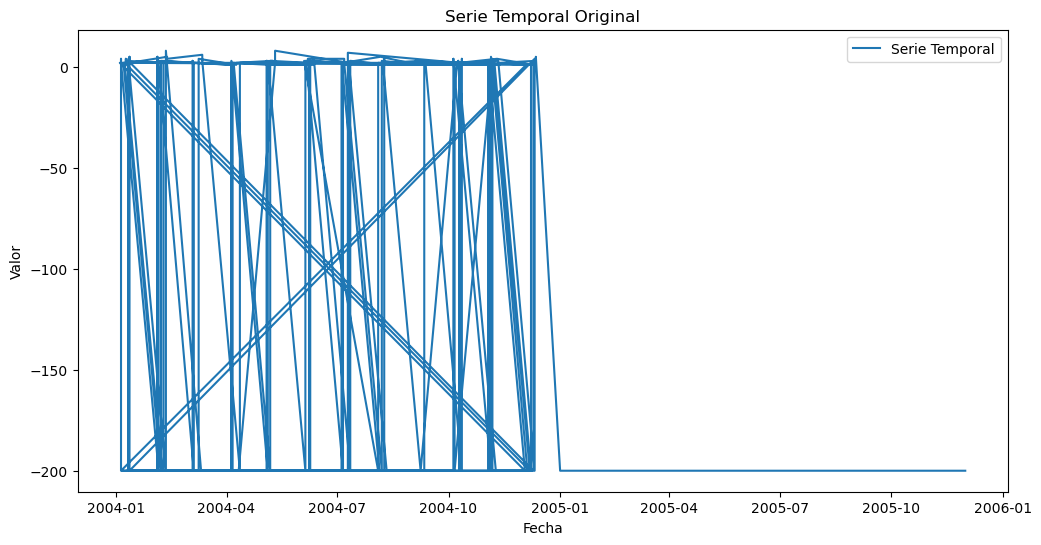

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convertir 'CO(GT)' a numérico
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')

# Eliminar filas con valores faltantes en 'Date' o 'CO(GT)'
df = df.dropna(subset=['Date', 'CO(GT)'])

# Verificar las primeras filas y tipos de datos
print(df[['Date', 'CO(GT)']].dtypes)
print(df[['Date', 'CO(GT)']].head())

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CO(GT)'], label='Serie Temporal')
plt.title("Serie Temporal Original")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()



In [11]:
print(df.columns)


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convertir 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Eliminar filas con fechas no válidas
df = df.dropna(subset=['Date'])

# Manejar valores faltantes en 'CO(GT)'
df.loc[:, 'CO(GT)'] = df['CO(GT)'].fillna(df['CO(GT)'].mean())

# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Escalar los valores entre 0 y 1
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['CO(GT)']])
test_scaled = scaler.transform(test[['CO(GT)']])

# Mostrar resultados escalados
print("Train Scaled:")
print(train_scaled[:5])

print("\nTest Scaled:")
print(test_scaled[:5])


Train Scaled:
[[0.97115385]
 [0.97115385]
 [0.        ]
 [0.97115385]
 [0.97115385]]

Test Scaled:
[[0.97115385]
 [0.96634615]
 [0.97115385]
 [0.97115385]
 [0.96634615]]


In [13]:
# Crear secuencias para LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Longitud de las secuencias
seq_length = 10

# Crear secuencias para entrenamiento y prueba
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Importar TensorFlow y construir el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1785 - val_loss: 0.2443
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1382 - val_loss: 0.1894
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1263 - val_loss: 0.1812
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1294 - val_loss: 0.1731
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1155 - val_loss: 0.1693
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1235 - val_loss: 0.1674
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1262 - val_loss: 0.1642
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1205 - val_loss: 0.1601
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1050 - val_loss: 0.1592
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1231 - val_loss: 0.1630
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1067 - val_loss: 0.1540
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1106 - val_loss: 0.

In [16]:
from prophet import Prophet

# Preparar los datos para Prophet
prophet_df = df.rename(columns={'Date': 'ds', 'Value': 'y'})

# Entrenar el modelo de Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Crear un marco de tiempo para predicciones
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
forecast = prophet_model.predict(future)

# Visualizar las predicciones
prophet_model.plot(forecast)
plt.title("Predicciones de Prophet")
plt.show()


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicciones con LSTM
y_pred_lstm = model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)  # Desescalar predicciones
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular métricas para LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_original, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_original, y_pred_lstm)

# Predicciones con Prophet
y_pred_prophet = forecast['yhat'].iloc[-len(test):].values

# Calcular métricas para Prophet
rmse_prophet = np.sqrt(mean_squared_error(test['Value'].values, y_pred_prophet))
mae_prophet = mean_absolute_error(test['Value'].values, y_pred_prophet)

# Imprimir resultados
print("\nMétricas de LSTM:")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")

print("\nMétricas de Prophet:")
print(f"RMSE: {rmse_prophet:.4f}")
print(f"MAE: {mae_prophet:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


NameError: name 'forecast' is not defined